Classification Accuracies:
C          Train Accuracy(%) Validation Accuracy(%) Test Accuracy(%)
0.01       99.72           98.89               98.00          
0.10       99.72           98.89               98.00          
1.00       99.72           97.78               98.00          
10.00      99.72           97.78               98.00          
100.00     99.72           98.89               98.00          


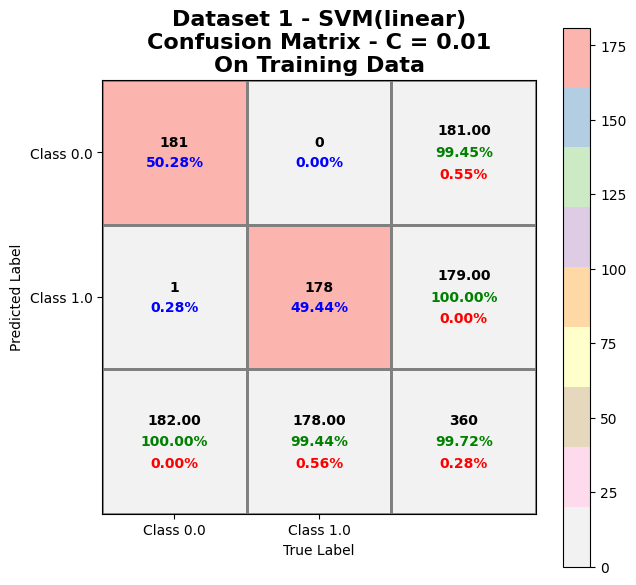

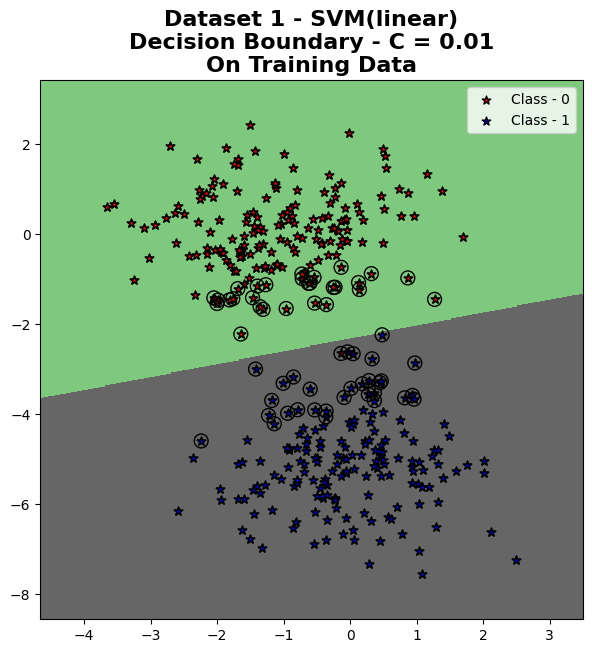

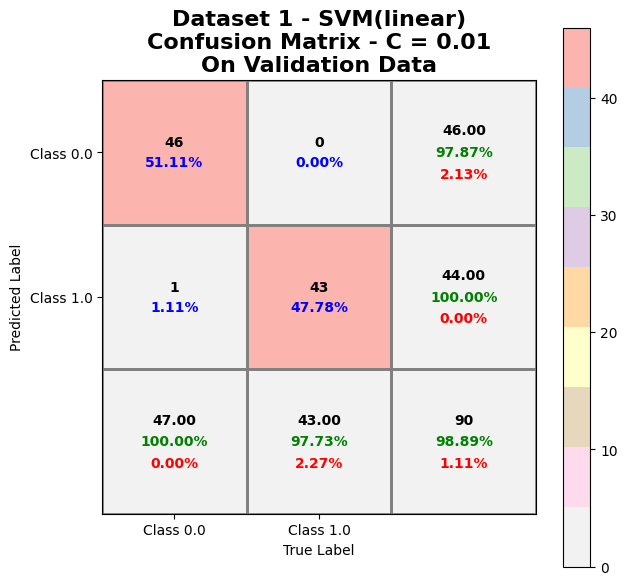

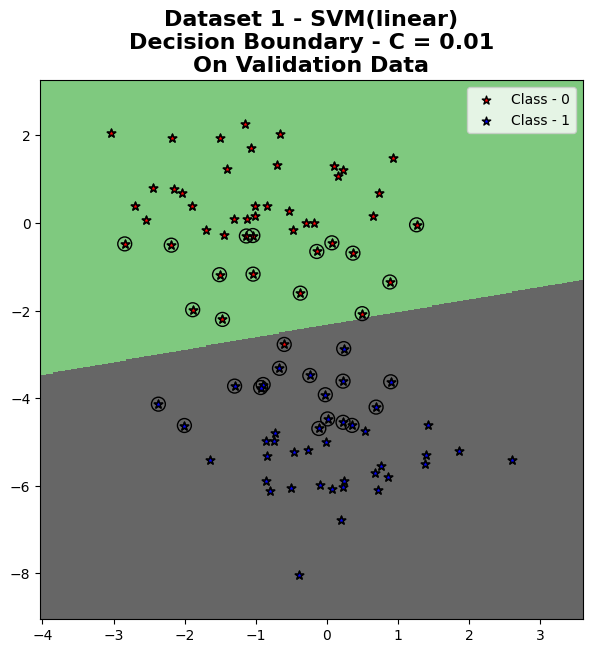

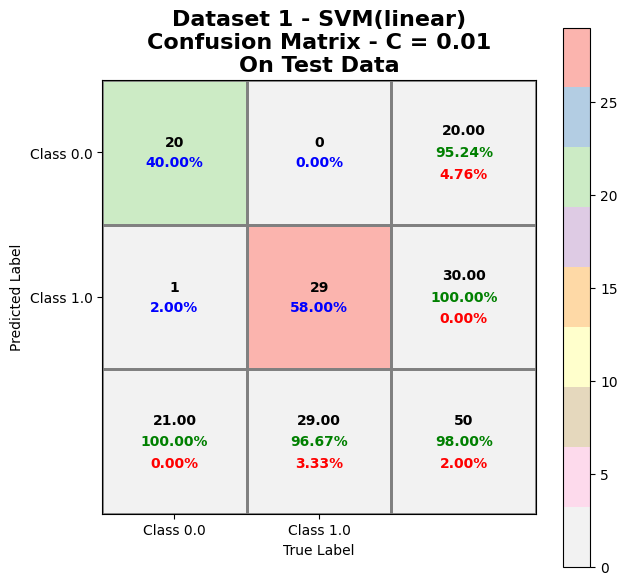

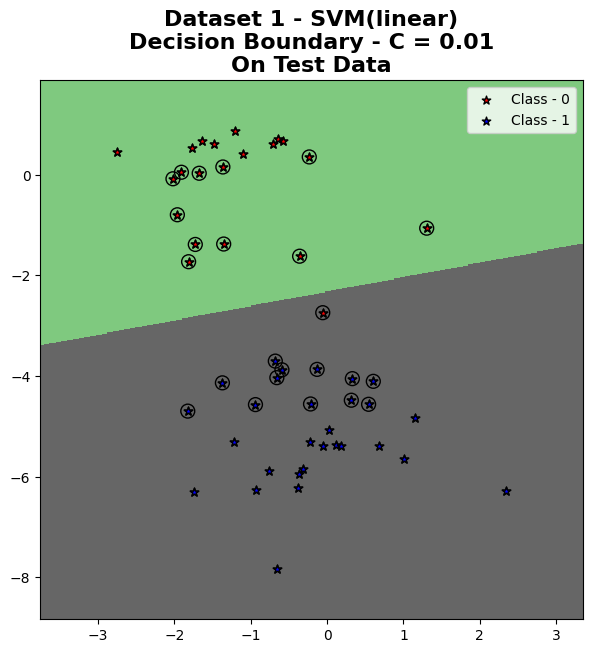

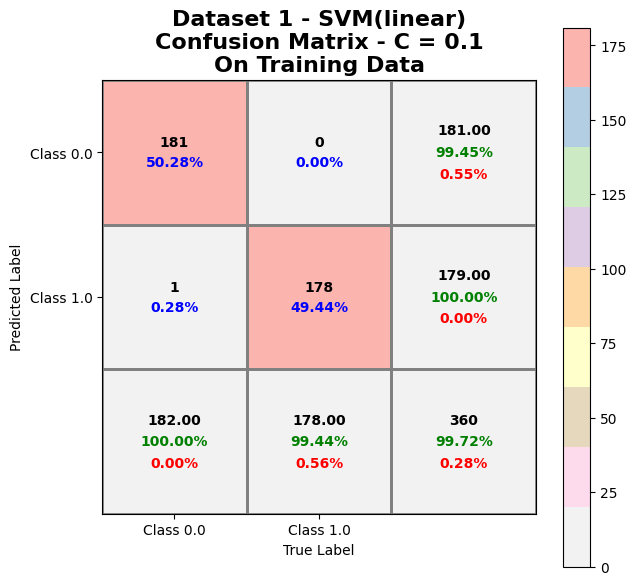

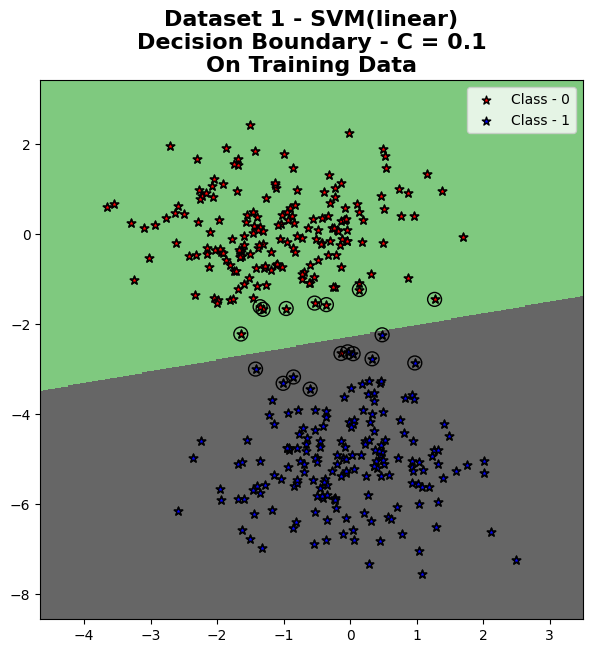

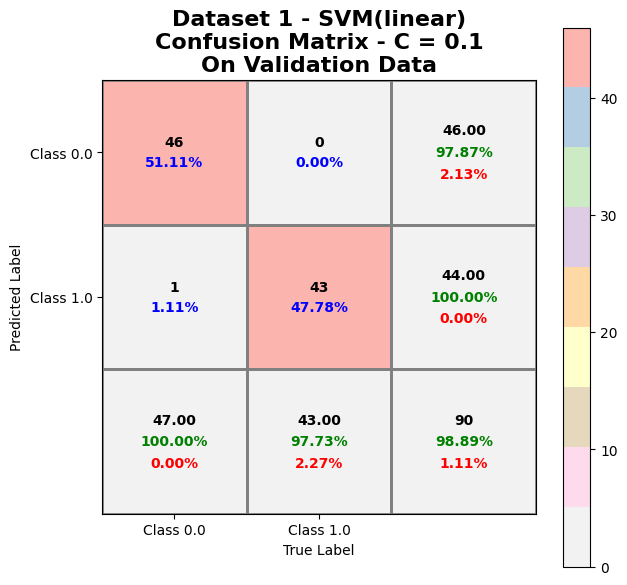

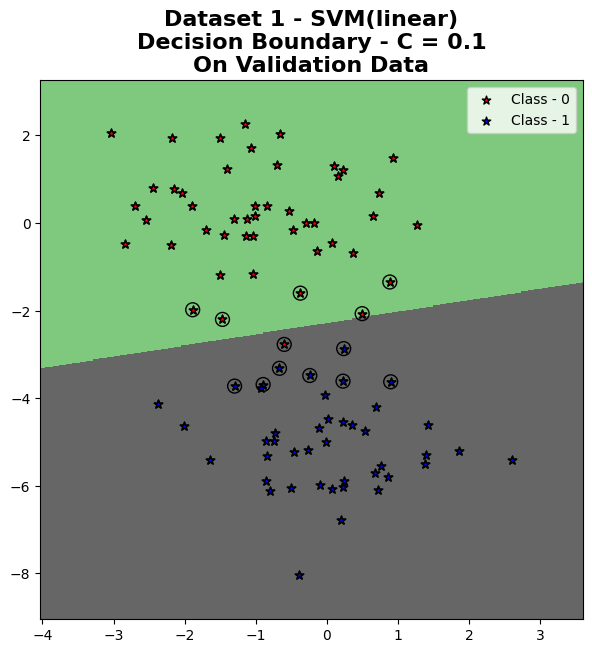

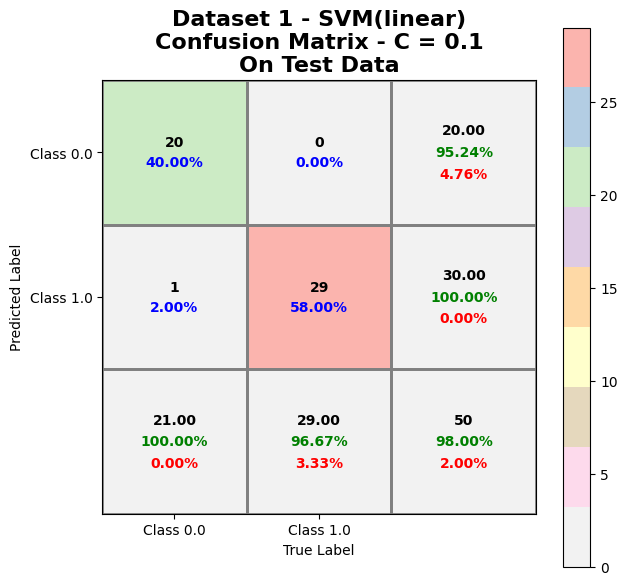

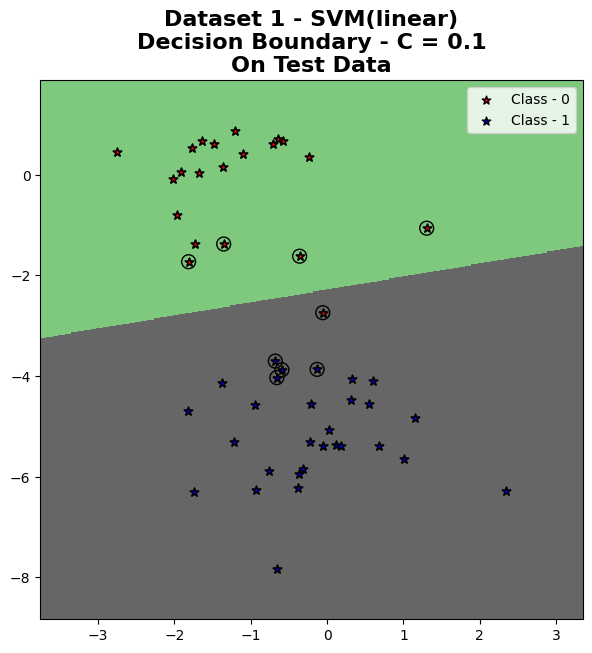

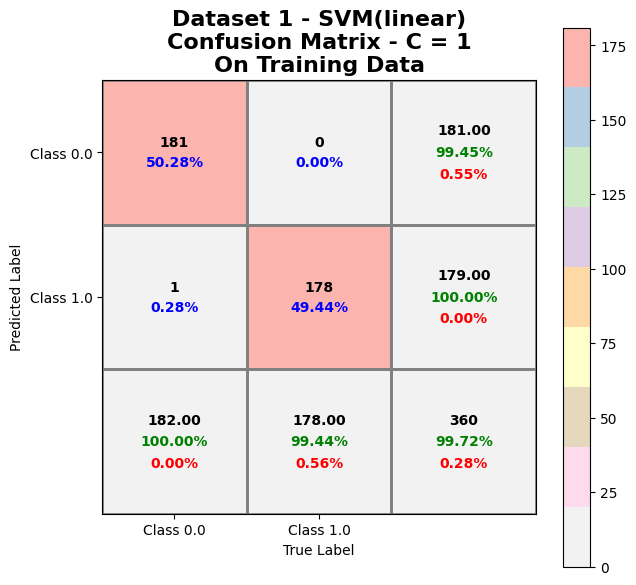

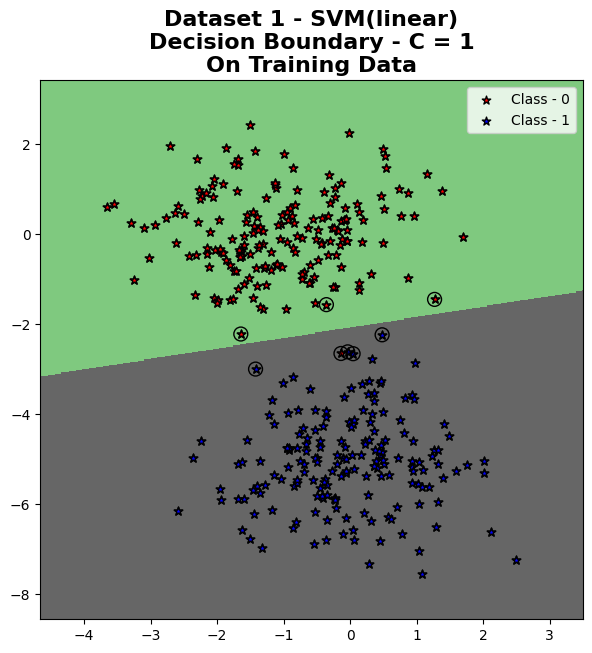

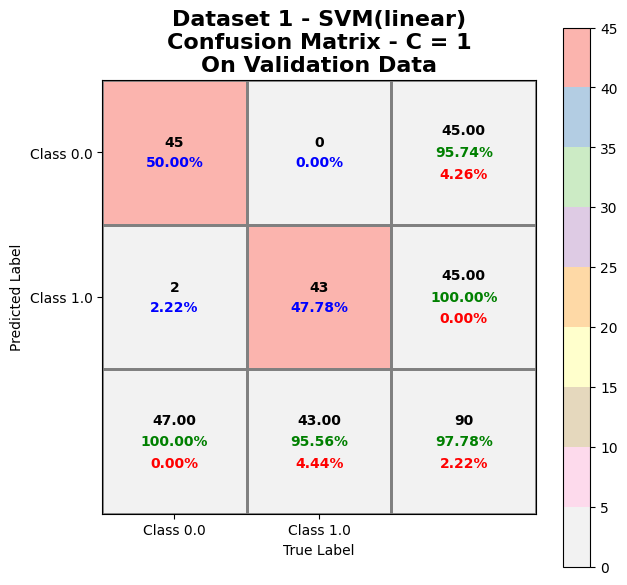

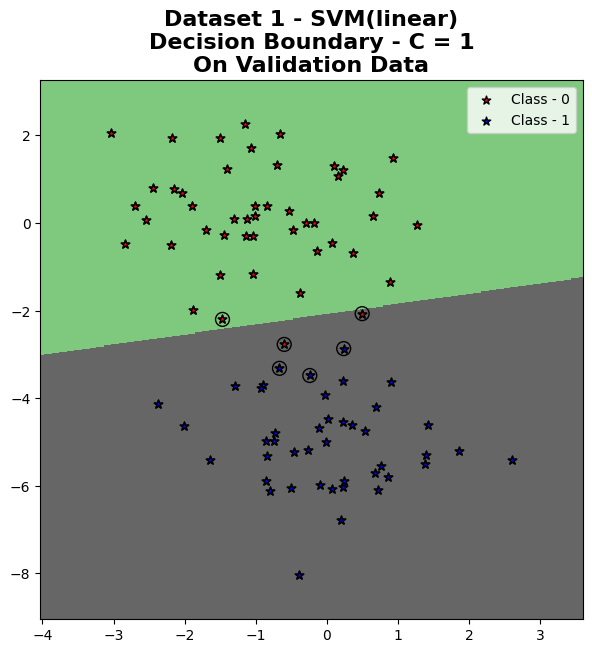

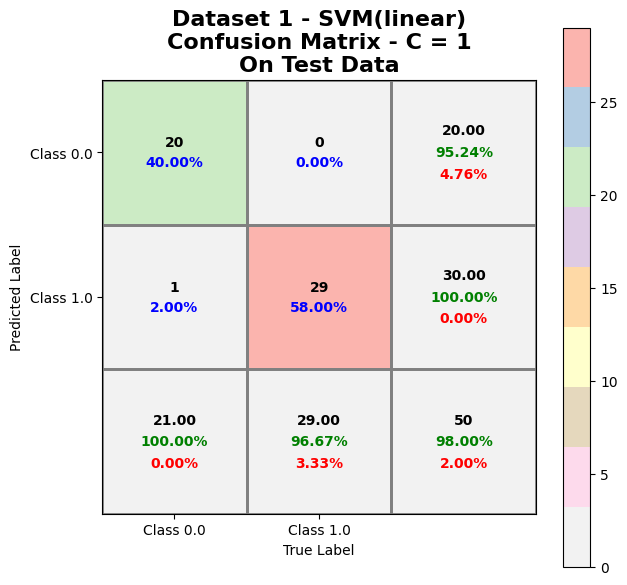

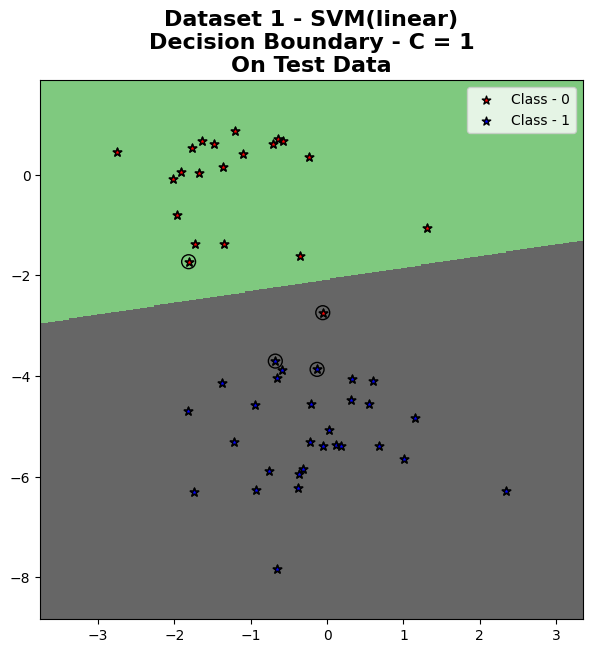

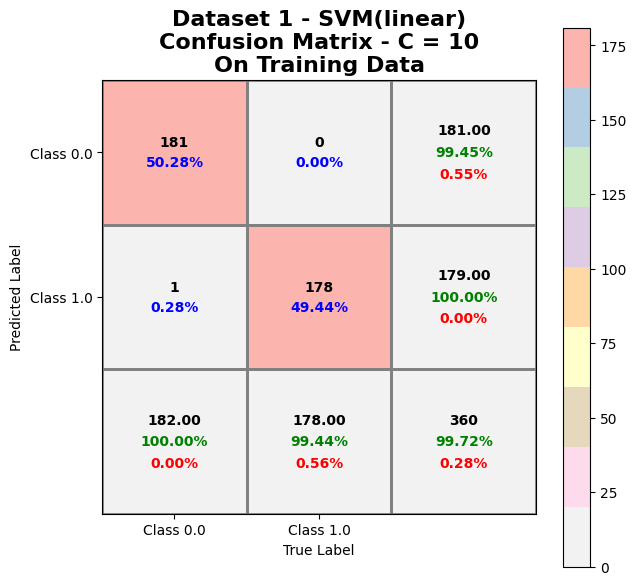

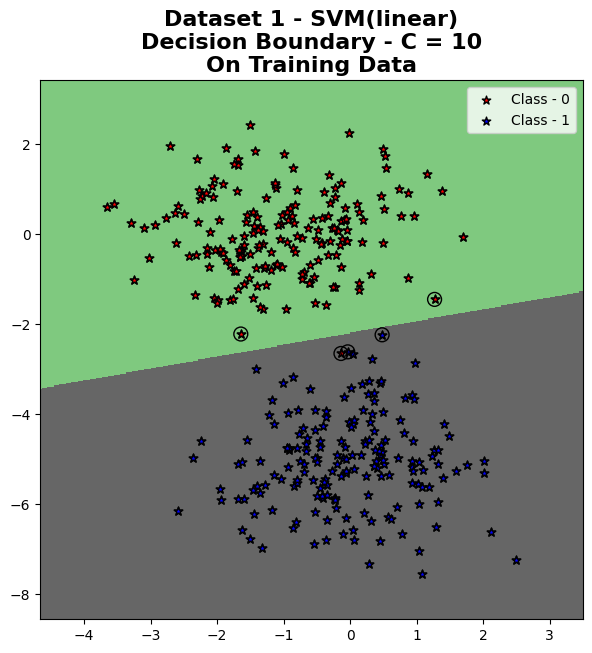

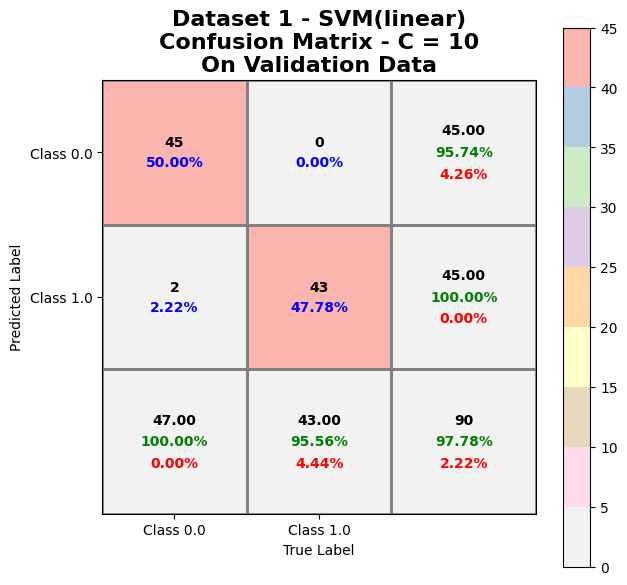

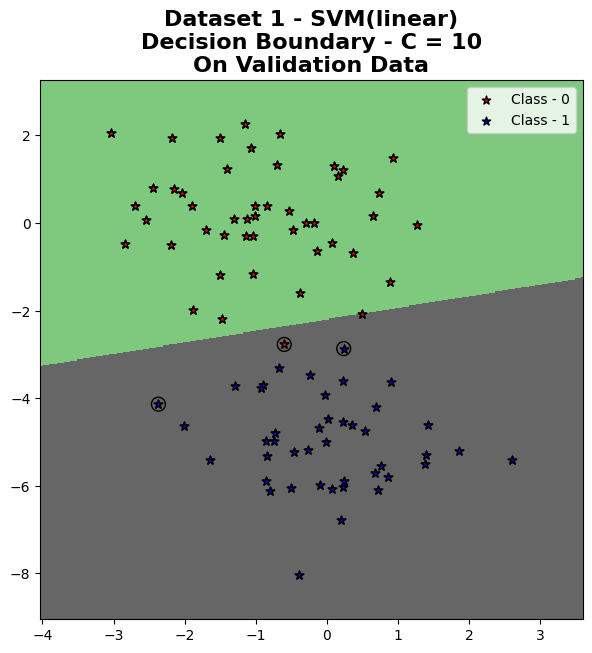

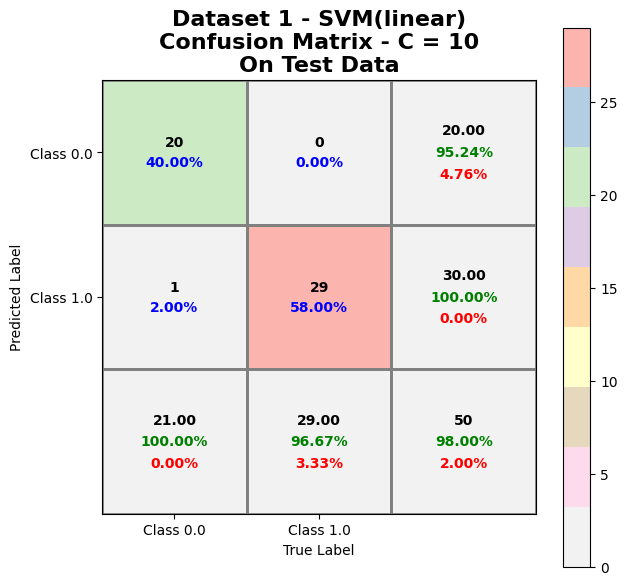

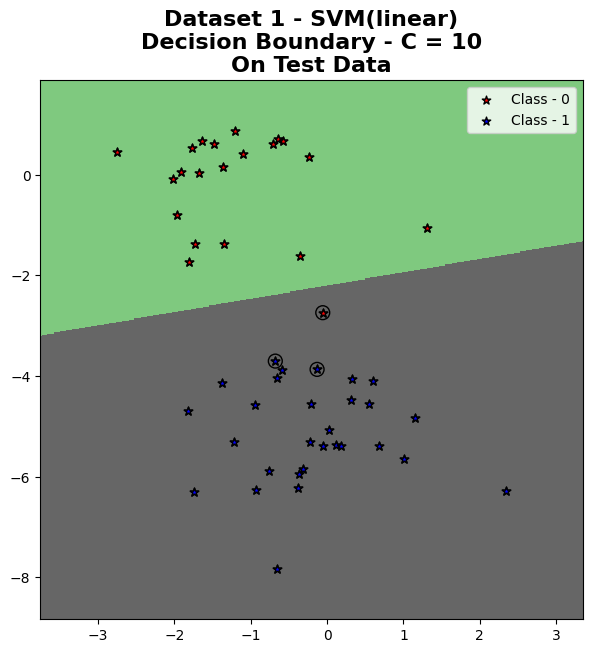

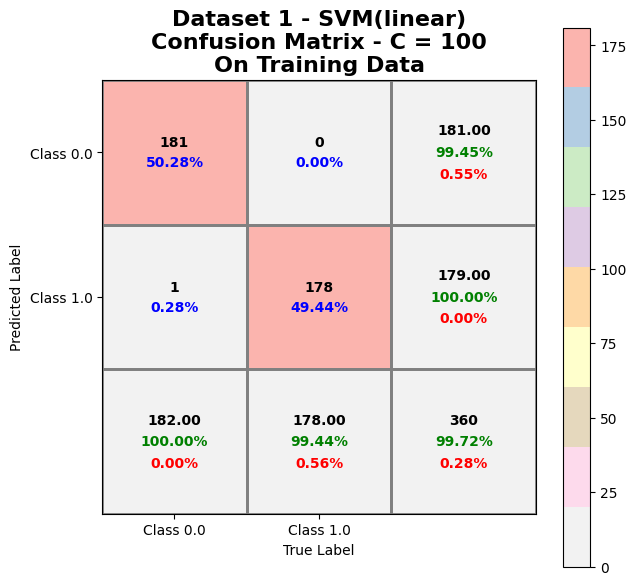

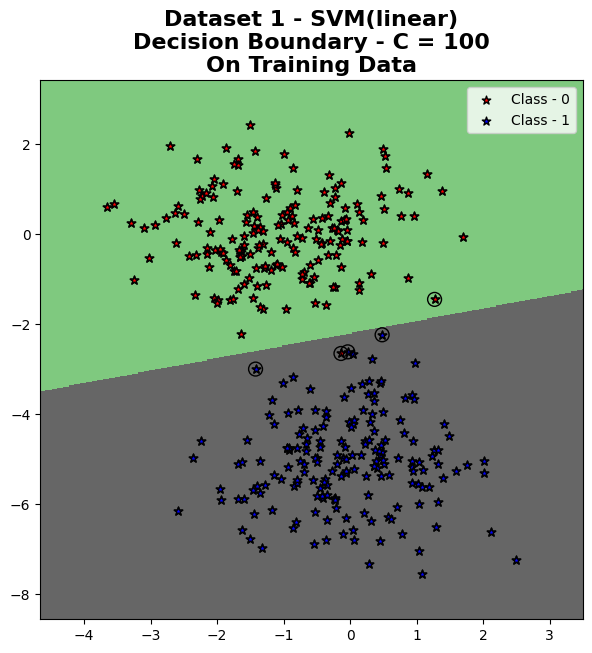

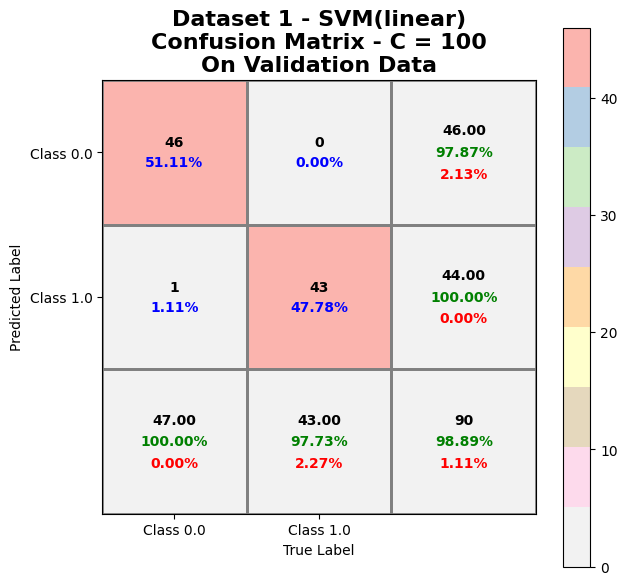

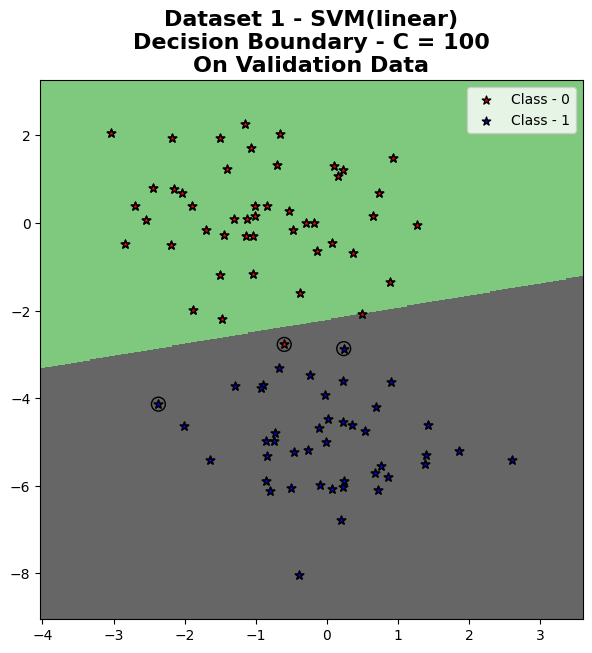

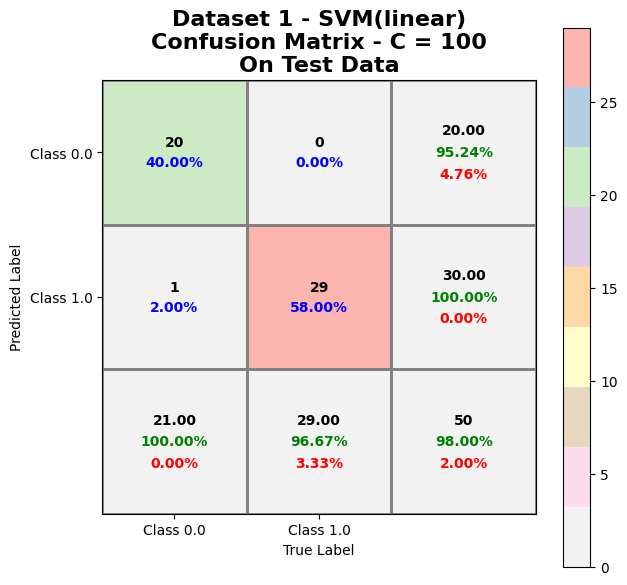

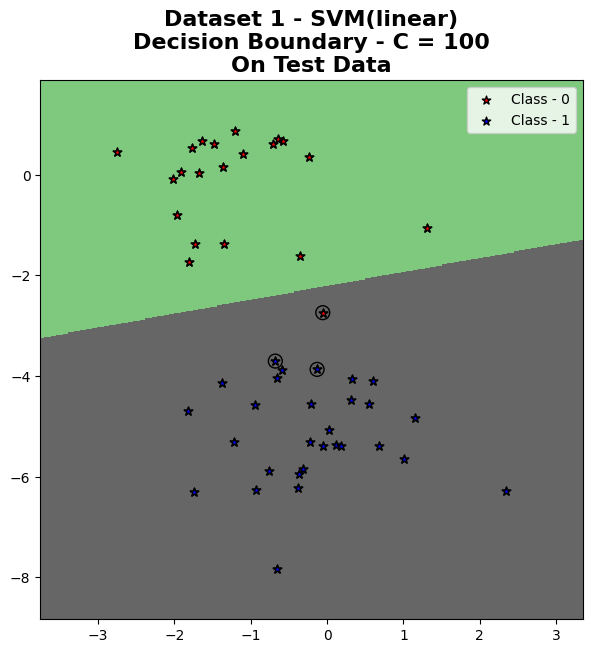

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.calibration import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


def build_and_train_model(c, x, y):
    # Train the SVM model
    model = SVC(C=c, kernel="linear")

    model.fit(x, y)

    return model


# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = np.mean(y_pred == y) * 100

    return accuracy, y_pred


def confusion_matrix(y_true, y_pred, accuracy, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)
    cm = np.zeros((num_labels + 1, num_labels + 1), float)
    label_to_index = {label: i for i, label in enumerate(labels)}
    true_positives = np.zeros(num_labels)
    pred_positives = np.zeros(num_labels)
    total_samples = len(y_true)
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index, pred_index] += 1
        true_positives[true_index] += 1 if true == pred else 0
        pred_positives[pred_index] += 1 if true == pred else 0
    cm = cm.T
    accuracy = np.sum(np.diag(cm)) / total_samples
    cm[-1, :-1] = (true_positives / np.sum(cm[:-1, :-1], axis=1)) * 100
    cm[:-1, -1] = (pred_positives / np.sum(cm[:-1, :-1], axis=0)) * 100
    cm[-1, -1] = accuracy * 100
    return cm


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, accuracy, title):
    cm = confusion_matrix(y_true, y_pred, accuracy)
    cm_backup = confusion_matrix(y_true, y_pred, accuracy)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 or j == cm.shape[1] - 1:
                cm[i, j] = 0.0
    number_of_classes = len(np.unique(y_true))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Pastel1_r)
    cm = cm_backup
    plt.title(title, fontsize=16, weight="bold")
    plt.colorbar()
    labels = []
    for i in np.unique(y_true):
        label = "Class " + str(i)
        labels.append(label)
    plt.xticks(range(len(np.unique(y_true))), labels=labels)
    plt.yticks(range(len(np.unique(y_true))), labels=labels)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    cm_except_last_row_col = cm[:-1, :-1]
    cm_row_sum = np.sum(cm_except_last_row_col, axis=1)
    cm_col_sum = np.sum(cm_except_last_row_col, axis=0)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        row_sum = 0
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 and j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(y_true.size, "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_row_sum[i], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif i == cm.shape[0] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_col_sum[j], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            else:
                percent = (cm[i, j] / y_true.size) * 100
                plt.text(
                    j,
                    i - 0.07,
                    format(int(cm[i, j]), "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i + 0.07,
                    format(percent, ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="blue",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)

    plt.grid(False)
    # plt.savefig("/home/dipendu/programs/mtech_2023/ml/ass2/trial/cls_2/"+plot_title+'.png')
    plt.show()


def plot_decision_boundary(x, y, model, c, title):
    N = 500
    # Create a meshgrid of points covering the feature space
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x1_range = np.linspace(x1_min, x1_max, N)
    x2_range = np.linspace(x2_min, x2_max, N)
    xx1, xx2 = np.meshgrid(x1_range, x2_range)
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot decision boundaries
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.pcolormesh(xx1, xx2, Z, cmap="Accent")
    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(
                x_label[:, 0],
                x_label[:, 1],
                c="red",
                edgecolors="black",
                marker="*",
                s=40,
                label="Class - " + str(int(class_label)),
            )
            # plt.legend()
        else:
            plt.scatter(
                x_label[:, 0],
                x_label[:, 1],
                c="blue",
                edgecolors="black",
                marker="*",
                s=40,
            )
        if class_label == classes[1]:
            plt.scatter(
                x_label[:, 0],
                x_label[:, 1],
                c="blue",
                edgecolors="black",
                marker="*",
                s=40,
                label="Class - " + str(int(class_label)),
            )
            # plt.legend()
        else:
            plt.scatter(
                x_label[:, 0],
                x_label[:, 1],
                c="red",
                edgecolors="black",
                marker="*",
                s=40,
            )
    # for i, C in enumerate([1, 100]):
    #     clf = LinearSVC(C=C, loss="hinge", random_state=42, dual="auto").fit(x, y)
    #     decision_function = clf.decision_function(x)
    #     support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    #     support_vectors = x[support_vector_indices]
    #     # ax = plt.gca()
    #     # DecisionBoundaryDisplay.from_estimator(clf, x, ax=ax, grid_resolution=50, plot_method="contour", colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    #     plt.scatter(
    #         support_vectors[:, 0],
    #         support_vectors[:, 1],
    #         s=100,
    #         linewidth=1,
    #         facecolors="none",
    #         edgecolors="k",
    #     )
    temp_model = build_and_train_model(c, x, y)
    support_vectors = temp_model.support_vectors_
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.legend()
    plt.title(title, fontsize=16, weight="bold")
    # plt.savefig("/home/dipendu/programs/mtech_2023/ml/ass2/trial/cls_2/"+plot_title+'.png')
    plt.show()


def read_dataset_1(current_directory, folder_number):
    # classification_dataset_1_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    classification_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Classification/Dataset 1/"
        + folder_number
        + "/"
    )

    classification_dataset_1_Train = (
        classification_dataset_1_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_1_Validation = (
        classification_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_1_Test = (
        classification_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def apply_SVM(train_x, train_y, val_x, val_y, test_x, test_y):
    models = {}
    results = {}
    C = [0.01, 0.1, 1, 10, 100]

    for c in C:
        model = build_and_train_model(c, train_x, train_y)
        models[c] = model

        # Evaluate the model on training data
        train_accuracy, train_y_pred = evaluate_model(model, train_x, train_y)

        # Evaluate the model on validation data
        val_accuracy, val_y_pred = evaluate_model(model, val_x, val_y)

        # Evaluate the model on test data
        test_accuracy, test_y_pred = evaluate_model(model, test_x, test_y)

        # Store results
        results[c] = {
            "train_accuracy": train_accuracy,
            "val_accuracy": val_accuracy,
            "test_accuracy": test_accuracy,
            "train_y_pred": train_y_pred,
            "val_y_pred": val_y_pred,
            "test_y_pred": test_y_pred,
        }

    # Print the table of classification accuracies
    print("Classification Accuracies:")
    print(
        "{:<10} {:<15} {:<15} {:<15}".format(
            "C", "Train Accuracy(%)", "Validation Accuracy(%)", "Test Accuracy(%)"
        )
    )
    for c, result in results.items():
        print(
            "{:<10.2f} {:<15.2f} {:<19.2f} {:<15.2f}".format(
                c,
                result["train_accuracy"],
                result["val_accuracy"],
                result["test_accuracy"],
            )
        )

    # Plot confusion matrices and decision boundary
    title = "Dataset 1 - SVM(linear)"
    cm = "\nConfusion Matrix - C = "
    db = "\nDecision Boundary - C = "

    for c in C:
        result = results[c]
        model = models[c]

        td = "\nOn Training Data"
        plot_confusion_matrix(
            train_y,
            result["train_y_pred"],
            result["train_accuracy"],
            title + cm + str(c) + td,
        )
        plot_decision_boundary(train_x, train_y, model, c, title + db + str(c) + td)

        td = "\nOn Validation Data"
        plot_confusion_matrix(
            val_y,
            result["val_y_pred"],
            result["val_accuracy"],
            title + cm + str(c) + td,
        )
        plot_decision_boundary(val_x, val_y, model, c, title + db + str(c) + td)

        td = "\nOn Test Data"
        plot_confusion_matrix(
            test_y,
            result["test_y_pred"],
            result["test_accuracy"],
            title + cm + str(c) + td,
        )
        plot_decision_boundary(test_x, test_y, model, c, title + db + str(c) + td)


def main():
    folder_number = "22"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_1(
        current_directory, folder_number
    )
    apply_SVM(train_x, train_y, val_x, val_y, test_x, test_y)


if __name__ == "__main__":
    main()